# **Batch Normalization**

**Q1. Explain the concept of batch normalization in the context of Artificial Neural Networks.**

Batch normalization is a technique used to improve the training of deep neural networks. It normalizes the inputs of each layer so that they have a mean of zero and a standard deviation of one within each mini-batch. This helps to stabilize and speed up the training process by reducing internal covariate shift, which is the change in the distribution of network activations due to the changing parameters during training.

**Q2. Describe the benefits of using batch normalization during training.**

Batch normalization provides several benefits during the training of neural networks:
- **Stabilizes Learning:** By normalizing the inputs to each layer, batch normalization reduces the internal covariate shift, stabilizing the learning process.
- **Accelerates Training:** It allows for higher learning rates, which can lead to faster convergence.
- **Improves Gradient Flow:** Helps mitigate issues related to vanishing and exploding gradients, particularly in deep networks.
- **Reduces Dependency on Initialization:** Networks become less sensitive to the initial values of the parameters.
- **Regularization Effect:** Acts as a form of regularization, potentially reducing the need for other forms of regularization like dropout. This is because each mini-batch introduces some noise to the learning process.
- **Improved Generalization:** Can lead to better generalization performance of the model on unseen data.

**Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.**

The working principle of batch normalization involves the following steps:

1. **Normalization Step:**
   - For each mini-batch, compute the mean (\(\mu_B\)) and variance (\(\sigma_B^2\)) of the inputs.
   - Normalize the inputs \(x_i\) by subtracting the batch mean and dividing by the batch standard deviation:
     \[
     \hat{x_i} = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
     \]
     where \(\epsilon\) is a small constant added for numerical stability.

2. **Scaling and Shifting:**
   - After normalization, the normalized values \(\hat{x_i}\) are scaled and shifted using learnable parameters \(\gamma\) and \(\beta\):
     \[
     y_i = \gamma \hat{x_i} + \beta
     \]
     where \(\gamma\) and \(\beta\) are learned during training and allow the network to restore the representational power that might be lost due to normalization. These parameters adjust the scale and the mean of the normalized output.

**Summary of the Process:**
- **Compute Batch Statistics:** Calculate the mean and variance for the current mini-batch.
- **Normalize:** Use the mean and variance to normalize the inputs.
- **Scale and Shift:** Apply the learned parameters \(\gamma\) and \(\beta\) to transform the normalized inputs.

In this way, batch normalization ensures that the inputs to each layer have a consistent distribution, which helps to stabilize and speed up the training process.

In [1]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

2024-08-03 09:27:29.222079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 09:27:29.362956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 09:27:29.404019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 09:27:29.667202: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 09:27:31.583204: W tensorflow/compiler/tf2

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.4.1


In [4]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [6]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

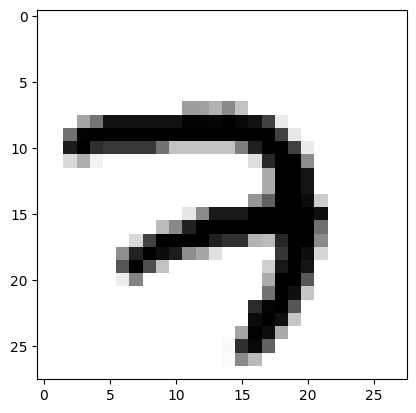

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

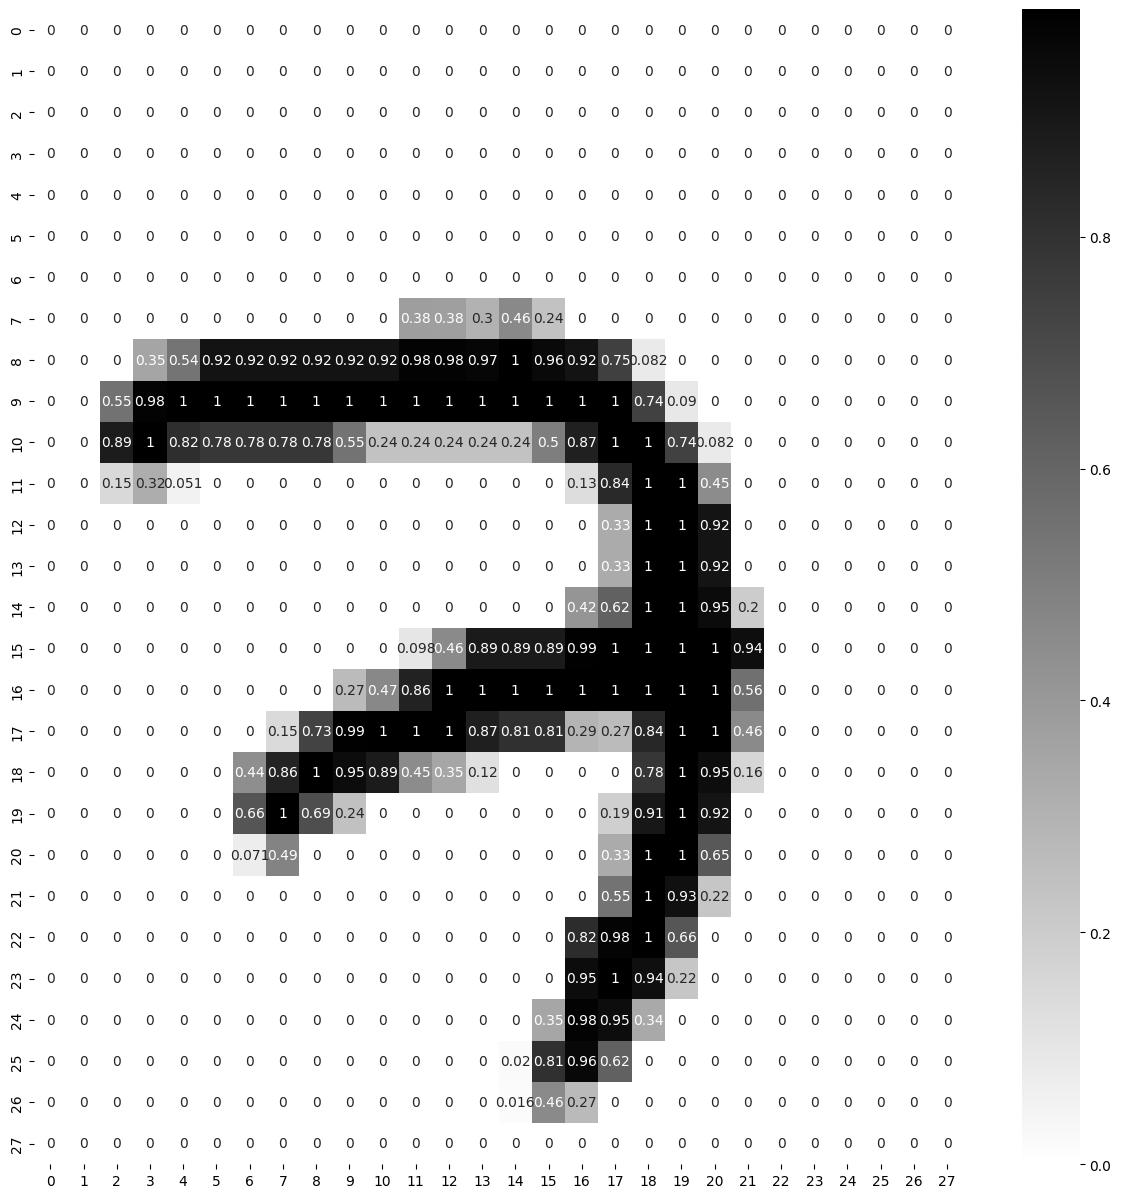

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [11]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/home/karan/virtual_envs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1722658170.359463    6431 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722658170.359756    6431 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722658170.359804    6431 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722658171.873565    6431 cuda_executor.cc:1001] could not open file to read NUMA 

In [12]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [13]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [15]:
len(hidden1.get_weights()[1])

300

In [16]:
hidden1.get_weights()

[array([[-0.0184981 , -0.03648857,  0.06354499, ..., -0.0709708 ,
          0.0085704 , -0.05523357],
        [ 0.05109264, -0.0732286 ,  0.02680749, ...,  0.05114271,
         -0.01787413,  0.03464253],
        [ 0.0232072 , -0.01129814,  0.00961289, ...,  0.01213676,
          0.01748355,  0.06872083],
        ...,
        [-0.07188528,  0.0741203 ,  0.00589055, ..., -0.04691222,
         -0.02582704,  0.04420158],
        [ 0.04535899, -0.02784556, -0.06560205, ...,  0.01870912,
         -0.03728859, -0.07113709],
        [ 0.01778231,  0.07348737,  0.07237558, ..., -0.04645484,
         -0.0325175 ,  0.02427346]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.0184981 , -0.03648857,  0.06354499, ..., -0.0709708 ,
         0.0085704 , -0.05523357],
       [ 0.05109264, -0.0732286 ,  0.02680749, ...,  0.05114271,
        -0.01787413,  0.03464253],
       [ 0.0232072 , -0.01129814,  0.00961289, ...,  0.01213676,
         0.01748355,  0.06872083],
       ...,
       [-0.07188528,  0.0741203 ,  0.00589055, ..., -0.04691222,
        -0.02582704,  0.04420158],
       [ 0.04535899, -0.02784556, -0.06560205, ...,  0.01870912,
        -0.03728859, -0.07113709],
       [ 0.01778231,  0.07348737,  0.07237558, ..., -0.04645484,
        -0.0325175 ,  0.02427346]], dtype=float32)

In [19]:
print("shape\n", biases.shape)

shape
 (300,)


In [20]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [21]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30


2024-08-03 09:42:20.577594: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2024-08-03 09:42:20.757148: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
I0000 00:00:1722658341.267717   11606 service.cc:146] XLA service 0x7f4c00006530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722658341.267881   11606 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-08-03 09:42:21.329605: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-03 09:42:21.501241: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-03 09:42:23.483401: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler

  61/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2669 - loss: 2.2073

I0000 00:00:1722658345.747423   11606 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1702/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7458 - loss: 0.9991

2024-08-03 09:42:32.856534: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_216', 20 bytes spill stores, 20 bytes spill loads

2024-08-03 09:42:33.162232: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_216', 16 bytes spill stores, 16 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7468 - loss: 0.9949 - val_accuracy: 0.9156 - val_loss: 0.3046
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9140 - loss: 0.3067 - val_accuracy: 0.9332 - val_loss: 0.2453
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9270 - loss: 0.2503 - val_accuracy: 0.9408 - val_loss: 0.2149
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9399 - loss: 0.2118 - val_accuracy: 0.9490 - val_loss: 0.1802
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9478 - loss: 0.1813 - val_accuracy: 0.9530 - val_loss: 0.1622
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9535 - loss: 0.1604 - val_accuracy: 0.9576 - val_loss: 0.1463
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9590 - loss: 0.1419 - val_accuracy: 0.9604 - val_loss: 0.1363
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9627 - loss: 0.1290 - val_accura

In [22]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [23]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.846964,0.599061,0.9156,0.304552
1,0.916182,0.292719,0.9332,0.245331
2,0.929945,0.240367,0.9408,0.214870
3,0.941218,0.205795,0.9490,0.180152
4,0.948164,0.179851,0.9530,0.162186
5,0.953655,0.159445,0.9576,0.146305
6,0.959145,0.142451,0.9604,0.136293
7,0.963000,0.128238,0.9638,0.124221
8,0.966727,0.116992,0.9676,0.118621
9,0.970218,0.106523,0.9694,0.113167


<Axes: >

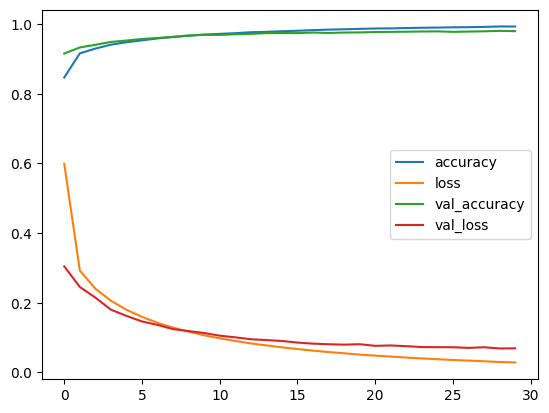

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9749 - loss: 0.0831


[0.06968159228563309, 0.9793000221252441]

In [26]:
x_new = X_test[:3]

In [27]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [28]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

2024-08-03 09:47:40.729453: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17', 4 bytes spill stores, 4 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [29]:
y_prob

array([[1.5396716e-06, 4.6283567e-08, 2.4852267e-05, 5.9257739e-04,
        2.1062666e-08, 5.9588609e-07, 1.3664189e-11, 9.9934822e-01,
        1.5047227e-06, 3.0595380e-05],
       [1.0315922e-06, 4.7074099e-07, 9.9993277e-01, 4.2127391e-05,
        3.0954782e-13, 4.2672799e-08, 4.2193889e-07, 1.4330611e-12,
        2.3121360e-05, 2.0637812e-12],
       [1.6899912e-05, 9.9567205e-01, 4.0731663e-04, 7.1470444e-05,
        1.1791758e-03, 1.4686826e-04, 1.7414862e-04, 1.4120783e-03,
        8.8543852e-04, 3.4546381e-05]], dtype=float32)

In [30]:
y_pred = np.argmax(y_prob, axis = -1)

In [31]:
y_pred

array([7, 2, 1])

In [32]:
actual

array([7, 2, 1], dtype=uint8)

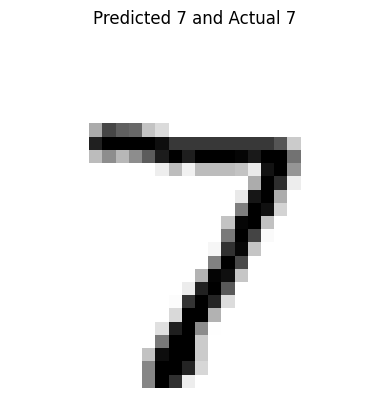

######################


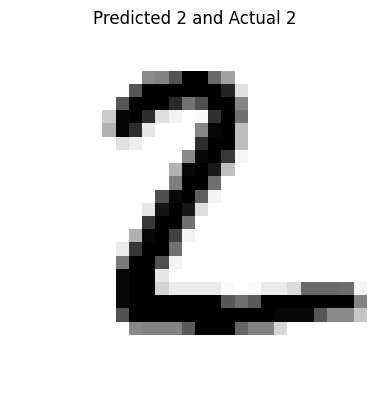

######################


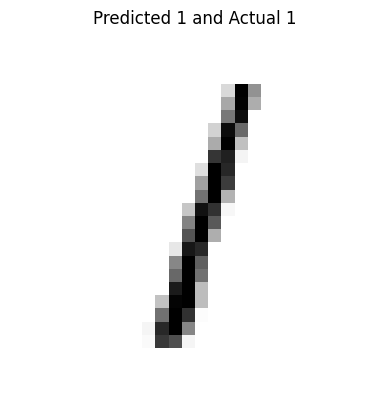

######################


In [33]:
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")

In [34]:
# Creating layers of ANN
LAYERS_With_BN = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),       
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(), 
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(), 
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf_with_bn = tf.keras.models.Sequential(LAYERS)

/home/karan/virtual_envs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf_with_bn.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [37]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30


2024-08-03 10:00:42.576442: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2024-08-03 10:00:42.804530: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9948 - loss: 0.0260 - val_accuracy: 0.9780 - val_loss: 0.0750
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9948 - loss: 0.0248 - val_accuracy: 0.9802 - val_loss: 0.0683
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0236 - val_accuracy: 0.9796 - val_loss: 0.0701
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9958 - loss: 0.0217 - val_accuracy: 0.9810 - val_loss: 0.0687
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9962 - loss: 0.0208 - val_accuracy: 0.9798 - val_loss: 0.0684
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9968 - loss: 0.0191 - val_accuracy: 0.9788 - val_loss: 0.0706
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9971 - loss: 0.0191 - val_accuracy: 0.9798 - val_loss: 0.0721
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9971 - loss: 0.0183 - val_accurac

In [38]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.993891,0.026791,0.9780,0.075008
1,0.994636,0.025327,0.9802,0.068299
2,0.995091,0.023833,0.9796,0.070085
3,0.995382,0.022716,0.9810,0.068666
4,0.996000,0.021435,0.9798,0.068416
5,0.996436,0.020213,0.9788,0.070567
6,0.996509,0.019326,0.9798,0.072093
7,0.996764,0.018385,0.9796,0.068961
8,0.997036,0.017419,0.9784,0.069490
9,0.997527,0.016631,0.9804,0.068490


<Axes: >

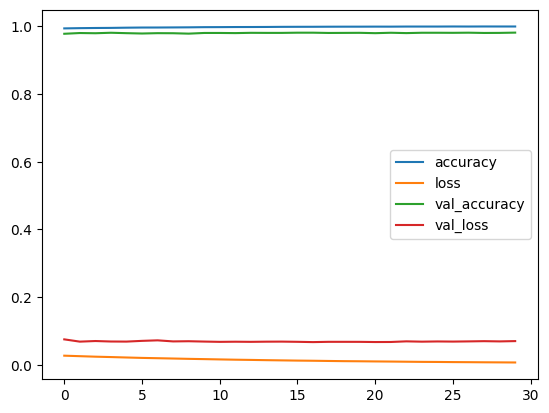

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
model_clf_with_bn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9761 - loss: 0.0861


[0.0721120610833168, 0.9796000123023987]

In [41]:
x_new = X_test[:3]
actual = y_test[:3]
y_prob = model_clf.predict(x_new)
y_prob.round(3)
y_pred = np.argmax(y_prob, axis = -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


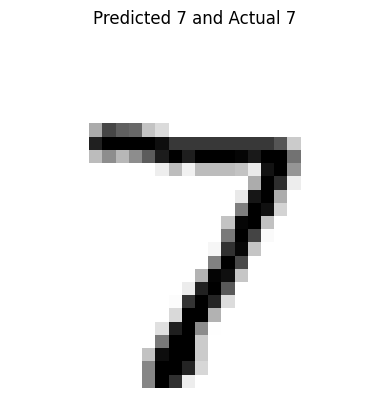

######################


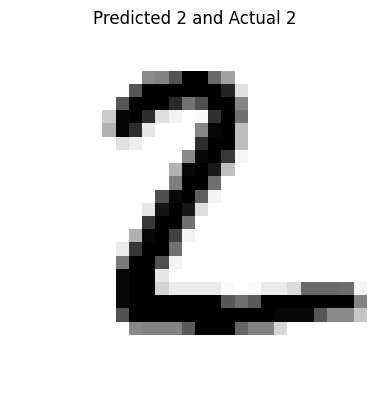

######################


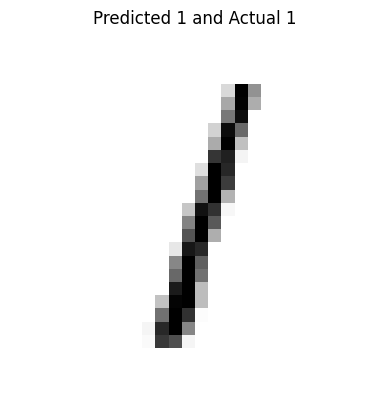

######################


In [42]:
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")

# **Conclusion**
### There is definitly improvemnet in the training, because we can see the increase in the accuracy but  since the dataset is small we cant see any major difference.

**Advantages of Batch Normalization:**

1. **Stabilizes Training:**
   - Batch normalization reduces internal covariate shift, which stabilizes the learning process and makes the training of deep networks more robust.
   
2. **Accelerates Convergence:**
   - By normalizing inputs to each layer, batch normalization allows for the use of higher learning rates, which can significantly speed up the convergence of the training process.
   
3. **Improves Gradient Flow:**
   - Helps mitigate issues related to vanishing and exploding gradients, especially in deep networks, leading to better gradient flow through the network.

4. **Reduces Sensitivity to Initialization:**
   - Makes neural networks less sensitive to the choice of initial parameter values, allowing for more flexibility in network design and training.

5. **Acts as a Regularizer:**
   - Batch normalization introduces a slight regularizing effect, reducing the need for other forms of regularization like dropout. This is because the mini-batch noise adds a form of noise to the training process.

6. **Improves Generalization:**
   - By stabilizing training and acting as a regularizer, batch normalization can lead to better generalization performance on unseen data.

**Potential Limitations of Batch Normalization:**

1. **Mini-Batch Dependency:**
   - The effectiveness of batch normalization depends on the size of the mini-batches. Very small mini-batches can result in noisy estimates of the batch statistics, leading to less stable training.
   
2. **Additional Computation:**
   - Batch normalization introduces additional computational overhead due to the calculation of mean and variance for each mini-batch and the subsequent normalization, scaling, and shifting steps.

3. **Inference Complexity:**
   - During inference, batch normalization requires storing the running estimates of the mean and variance, which adds to the model complexity. The handling of these estimates must be done carefully to ensure consistent performance.

4. **Non-Applicability to Certain Models:**
   - Batch normalization may not be suitable for certain types of models, such as recurrent neural networks (RNNs), where the training data is sequential and the notion of a fixed-size mini-batch is not always applicable. Alternatives like layer normalization or recurrent batch normalization are often used in such cases.

5. **Dependency on Data Distribution:**
   - If the training and testing data distributions are significantly different, the learned batch normalization parameters (mean and variance) might not generalize well, potentially leading to performance degradation during inference.

Despite these limitations, batch normalization is widely used in practice due to its significant benefits in stabilizing and accelerating the training of deep neural networks.

# **Complete**